In [1]:
import pandas as pd
from geopy.distance import great_circle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings_summary.csv')

In [3]:
df_listings = df[['street','neighbourhood','city','state','zipcode','market','smart_location','country_code','country','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','has_availability','availability_30','availability_60','availability_90','availability_365','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','requires_license','instant_bookable','is_business_travel_ready','cancellation_policy','reviews_per_month']]

In [4]:
df_listings.isnull().sum()

street                             0
neighbourhood                   1131
city                               5
state                             84
zipcode                          656
market                            63
smart_location                     0
country_code                       0
country                            0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         32
bedrooms                          18
beds                              40
bed_type                           0
amenities                          0
square_feet                    22106
price                              0
weekly_price                   18871
monthly_price                  19893
security_deposit                9361
cleaning_fee                    7146
guests_included                    0
extra_people                       0
m

In [5]:
df_final = df_listings[['latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','cancellation_policy']]

In [6]:
df_final['price']= df_final['price'].str.replace('$','')
df_final['security_deposit']= df_final['security_deposit'].str.replace('$','')
df_final['cleaning_fee']= df_final['cleaning_fee'].str.replace('$','')

In [7]:
df_final['price']= df_final['price'].str.replace(',','')
df_final['security_deposit']= df_final['security_deposit'].str.replace(',','')
df_final['cleaning_fee']= df_final['cleaning_fee'].str.replace(',','')

In [8]:
df_final.isnull().sum()

latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        32
bedrooms                         18
beds                             40
price                             0
security_deposit               9361
cleaning_fee                   7146
guests_included                   0
review_scores_rating           4389
review_scores_accuracy         4414
review_scores_cleanliness      4411
review_scores_checkin          4432
review_scores_communication    4418
review_scores_location         4431
review_scores_value            4435
cancellation_policy               0
dtype: int64

In [9]:
df_final['security_deposit'] = df_final['security_deposit'].fillna('0')
df_final['cleaning_fee'] = df_final['cleaning_fee'].fillna('0')

In [10]:
df_final.dtypes

latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                           object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
cancellation_policy             object
dtype: object

In [11]:
df_final['security_deposit'] = pd.to_numeric(df_final['security_deposit'])
df_final['cleaning_fee'] = pd.to_numeric(df_final['cleaning_fee'])
df_final['price'] = pd.to_numeric(df_final['price'])

In [12]:
df_final.head(2)

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,60.0,200.0,30.0,1,93.0,10.0,9.0,10.0,10.0,10.0,9.0,strict_14_with_grace_period
1,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,17.0,0.0,0.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible


In [13]:
df_final.dtypes

latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
security_deposit               float64
cleaning_fee                   float64
guests_included                  int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
cancellation_policy             object
dtype: object

In [14]:
df_final.property_type.value_counts()

Apartment                 20225
Condominium                 612
Loft                        460
House                       398
Serviced apartment          175
Hostel                      128
Townhouse                    99
Guest suite                  74
Bed and breakfast            64
Guesthouse                   57
Hotel                        50
Other                        47
Boutique hotel               43
Bungalow                     20
Boat                         17
Tiny house                   12
Camper/RV                    11
Houseboat                    11
Villa                        10
Pension (South Korea)         7
Aparthotel                    7
Cabin                         6
Cottage                       4
Resort                        3
Train                         2
Casa particular (Cuba)        2
Castle                        2
Chalet                        1
Tipi                          1
Cave                          1
Island                        1
In-law  

In [15]:
property =pd.DataFrame(df_final.property_type.value_counts())

In [16]:
prop = np.array(property.index)

In [17]:
for i in range(6,(prop.shape[0])):
    prop_string = prop[i]
    print(prop_string)
    df_final.property_type = df_final.property_type.str.replace(prop_string, 'others')

Townhouse
Guest suite
Bed and breakfast
Guesthouse
Hotel
Other
Boutique hotel
Bungalow
Boat
Tiny house
Camper/RV
Houseboat
Villa
Pension (South Korea)
Aparthotel
Cabin
Cottage
Resort
Train
Casa particular (Cuba)
Castle
Chalet
Tipi
Cave
Island
In-law
Barn


In [18]:
df_final = df_final[df_final.property_type != "Pension (South Korea)"]
df_final = df_final[df_final.property_type != "Casa particular (Cuba)"]

In [19]:
df_final.property_type.unique()

array(['others', 'Apartment', 'Condominium', 'Loft', 'House',
       'Serviced apartment', 'Hostel'], dtype=object)

In [20]:
df_final['property_type'] = pd.Categorical(df_final['property_type'])

In [21]:
df2 = pd.get_dummies(df_final['property_type'], prefix = 'property_type')

In [22]:
df_final = pd.concat([df_final, df2], axis=1)

In [23]:
df_final.head(2)

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,review_scores_location,review_scores_value,cancellation_policy,property_type_Apartment,property_type_Condominium,property_type_Hostel,property_type_House,property_type_Loft,property_type_Serviced apartment,property_type_others
0,52.534537,13.402557,others,Entire home/apt,3,1.0,1.0,2.0,60.0,200.0,...,10.0,9.0,strict_14_with_grace_period,0,0,0,0,0,0,1
1,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,17.0,0.0,...,10.0,10.0,flexible,1,0,0,0,0,0,0


In [24]:
df_final.room_type.value_counts()

Private room       11525
Entire home/apt    10722
Shared room          296
Name: room_type, dtype: int64

In [25]:
df_final['room_type'] = pd.Categorical(df_final['room_type'])

In [26]:
df2 = pd.get_dummies(df_final['room_type'], prefix = 'room_type')

In [27]:
df_final = pd.concat([df_final, df2], axis=1)

In [28]:
df_final['cancellation_policy'] = pd.Categorical(df_final['cancellation_policy'])

In [29]:
df2 = pd.get_dummies(df_final['cancellation_policy'], prefix = 'cancellation_policy')

In [30]:
df_final = pd.concat([df_final, df2], axis=1)

In [31]:
df_final.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'cancellation_policy',
       'property_type_Apartment', 'property_type_Condominium',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Serviced apartment', 'property_type_others',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'],
      dtype='object')

In [32]:
df_final1 = df_final

In [33]:
df_final1 = df_final1.drop(['property_type','room_type','cancellation_policy'],axis=1)

In [34]:
df_final1.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'property_type_Apartment',
       'property_type_Condominium', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft',
       'property_type_Serviced apartment', 'property_type_others',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'],
      dtype='object')

In [35]:
df_final1.shape

(22543, 32)

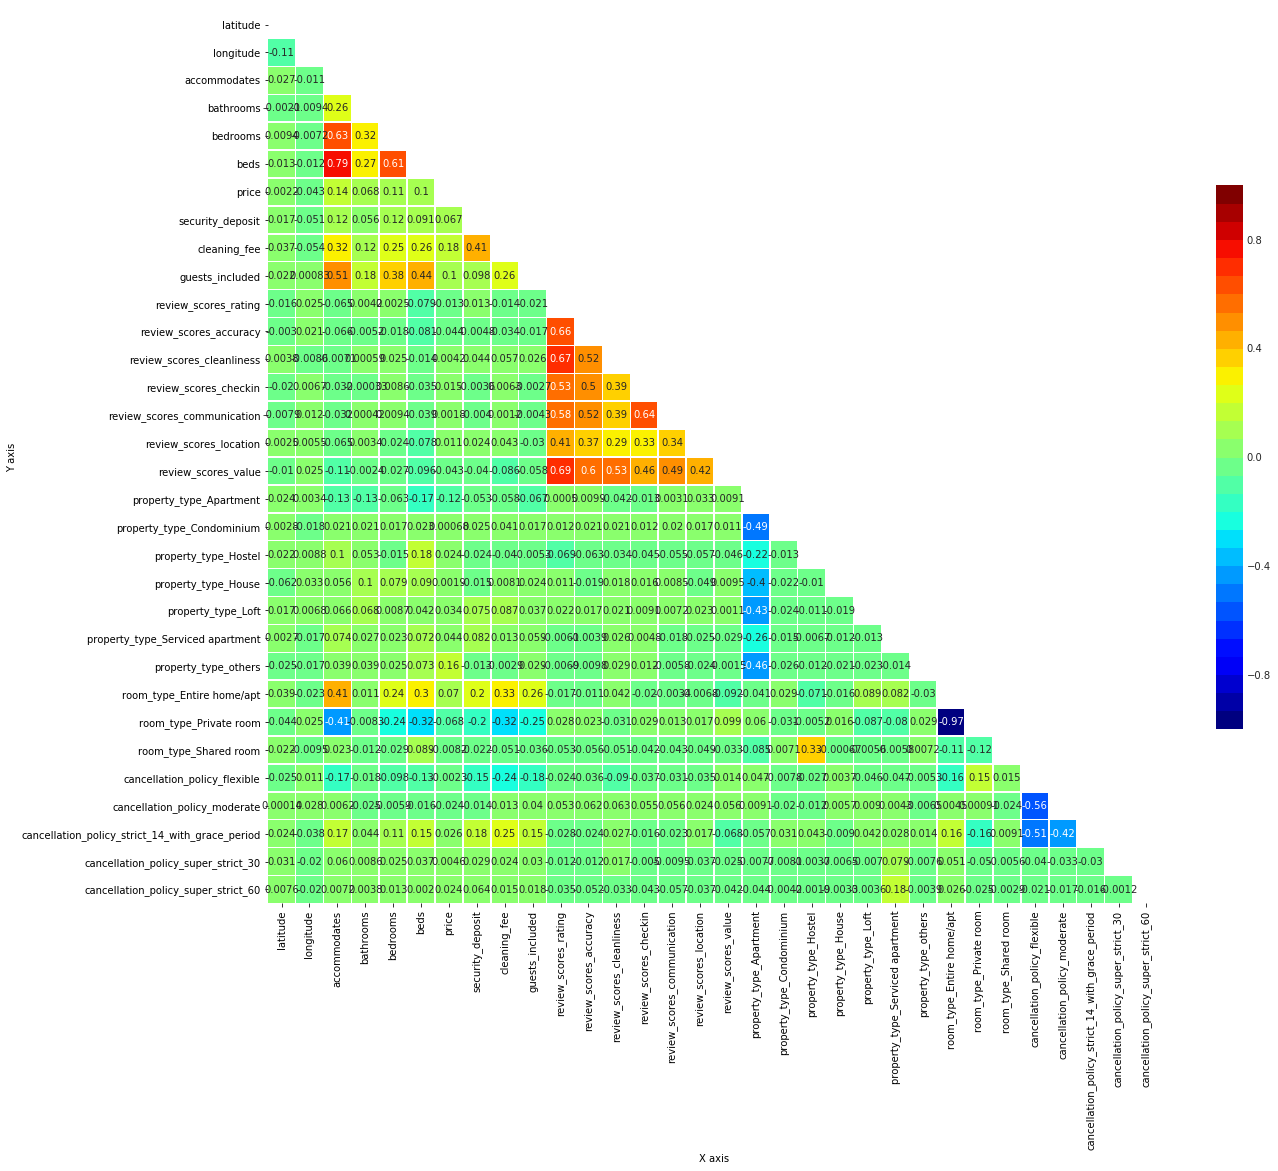

In [36]:

#corre = df_final[['security_deposit','cleaning_fee','price']].corr()
corre = df_final1.corr()
mask = np.zeros_like(corre)
mask[np.triu_indices_from(mask)] = True
cmap = plt.cm.get_cmap('jet',30)
fig = plt.figure()
f,ax = plt.subplots(figsize=(20,20))
fig.suptitle('HeaMap')
with sns.axes_style("white"):
  ax = sns.heatmap(corre, mask=mask, cmap=cmap, annot=True, vmax=1.0, vmin=-1.0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.xlabel("X axis")
  plt.ylabel("Y axis")
  fig
plt.show()

In [37]:
df_final1.isnull().sum()

latitude                                              0
longitude                                             0
accommodates                                          0
bathrooms                                            32
bedrooms                                             18
beds                                                 40
price                                                 0
security_deposit                                      0
cleaning_fee                                          0
guests_included                                       0
review_scores_rating                               4381
review_scores_accuracy                             4406
review_scores_cleanliness                          4403
review_scores_checkin                              4424
review_scores_communication                        4410
review_scores_location                             4423
review_scores_value                                4427
property_type_Apartment                         

In [38]:
mean_bathrooms = df_final1['bathrooms'].mean()
df_final1['bathrooms'] = df_final1['bathrooms'].fillna(mean_bathrooms)
mean_bedrooms = df_final1['bedrooms'].mean()
df_final1['bedrooms'] = df_final1['bedrooms'].fillna(mean_bedrooms)
mean_beds = df_final1['beds'].mean()
df_final1['beds'] = df_final1['beds'].fillna(mean_beds)
mean_rating = df_final1['review_scores_rating'].mean()
df_final1['review_scores_rating'] = df_final1['review_scores_rating'].fillna(mean_rating)
mean_accuracy = df_final1['review_scores_accuracy'].mean()
df_final1['review_scores_accuracy'] = df_final1['review_scores_accuracy'].fillna(mean_accuracy)
mean_cleanliness = df_final1['review_scores_cleanliness'].mean()
df_final1['review_scores_cleanliness'] = df_final1['review_scores_cleanliness'].fillna(mean_cleanliness)
mean_checkin = df_final1['review_scores_checkin'].mean()
df_final1['review_scores_checkin'] = df_final1['review_scores_checkin'].fillna(mean_checkin)
mean_communication = df_final1['review_scores_communication'].mean()
df_final1['review_scores_communication'] = df_final1['review_scores_communication'].fillna(mean_communication)
mean_location = df_final1['review_scores_location'].mean()
df_final1['review_scores_location'] = df_final1['review_scores_location'].fillna(mean_location)
mean_value = df_final1['review_scores_value'].mean()
df_final1['review_scores_value'] = df_final1['review_scores_value'].fillna(mean_value)


In [39]:
df_final1.shape

(22543, 32)

In [40]:
df_final1.drop(df_final1[ (df_final1.price > 400) | (df_final1.price == 0) ].index, axis=0, inplace=True)

In [41]:
def distance_to_mid(lat, lon):
    berlin_centre = (52.5027778,13.404166666666667)
    accommodation = (lat,lon)
    return great_circle(berlin_centre,accommodation).miles

In [42]:
df_final1= df_final1.assign(distance=df_final1.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1))

In [43]:
df_final1.isnull().sum()

latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
security_deposit                                   0
cleaning_fee                                       0
guests_included                                    0
review_scores_rating                               0
review_scores_accuracy                             0
review_scores_cleanliness                          0
review_scores_checkin                              0
review_scores_communication                        0
review_scores_location                             0
review_scores_value                                0
property_type_Apartment                            0
property_type_Condominium                     

In [44]:
df_final1 = df_final1.drop(["latitude","longitude"],axis=1)

In [45]:
df_final1['price'].describe()

count    22432.000000
mean        57.577612
std         42.165267
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        400.000000
Name: price, dtype: float64

In [46]:
y = df_final1['price']

In [101]:
X = df_final1.drop(['price'],axis=1)

In [74]:
# Scaling function
def minmaxscaling(X):
    min_max=MinMaxScaler()
    X_minmax=pd.DataFrame(min_max.fit_transform(X),index =X.index,columns = X.columns)
    return X_minmax

In [49]:
X.shape

(22432, 30)

In [86]:
X = minmaxscaling(X)

In [87]:
# Dont make any changes here
# If you go wrong you can refer here
# X = X[['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','property_type_Apartment','property_type_Condominium','property_type_Hostel','property_type_House','property_type_Loft','property_type_Serviced apartment','property_type_others','room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60','distance']]

In [ ]:
# X = X[['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','property_type_Apartment','property_type_Condominium','property_type_Hostel','property_type_House','property_type_Loft','property_type_Serviced apartment','property_type_others','room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60','distance']]

In [108]:
 X = X[['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','property_type_Apartment','property_type_Condominium','property_type_Hostel','property_type_House','property_type_Loft','property_type_Serviced apartment','property_type_others','room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60','distance']]
    

In [76]:
#X = X[['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','review_scores_rating','review_scores_accuracy','property_type_Apartment','property_type_Condominium','property_type_Hostel','property_type_House','property_type_Loft','property_type_Serviced apartment','property_type_others','room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60','distance']]

In [77]:
X.shape

(22432, 24)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [95]:
import re
import xgboost as xgb

In [104]:
booster = xgb.XGBRegressor()
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


In [105]:
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [106]:
r2_score(y_test, y_pred_test)

0.5562042286338342

In [107]:
mean_squared_error(y_test,y_pred_test)

791.7301891625145

In [90]:
lm = LinearRegression()
modellinear = lm.fit(X_train,y_train)
y_test_predicted  = modellinear.predict(X_test)

In [91]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
modelrandom = rf.fit(X_train,y_train)
Y_test_predicted_rf = modelrandom.predict(X_test)

In [69]:
# Linear Regression R2 score
r2_score(y_test,y_test_predicted)  

0.45317236436931974

In [92]:
# RandomForest R2 score
r2_score(y_test,Y_test_predicted_rf)

0.5137477177171881

In [93]:
from sklearn.metrics import mean_squared_error

In [94]:
mean_squared_error(y_test,Y_test_predicted_rf)

867.4724642989814

# Testing features

In [176]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [177]:
X.shape

(22432, 30)

In [178]:
X_t = X.iloc[:,0:30]

In [179]:
y_t = y

In [180]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [181]:
fit = bestfeatures.fit(X_t,y_t)

In [182]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_t.columns)

In [183]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [188]:
dfff = featureScores.nlargest(30,'Score')

In [ ]:
security_deposit, cleaning_fee, accommodates, cancellation_policy_super_strict_60, beds 

In [189]:
dfff

,Specs,Score
4,security_deposit,1.067484e+06
5,cleaning_fee,1.639439e+05
0,accommodates,6.969487e+03
28,cancellation_policy_super_strict_60,5.625095e+03
3,beds,5.074475e+03
21,room_type_Entire home/apt,4.393426e+03
22,room_type_Private room,3.808607e+03
6,guests_included,2.801214e+03
27,cancellation_policy_super_strict_30,2.409875e+03
19,property_type_Serviced apartment,2.173891e+03


In [ ]:
X = X[['security_deposit','cleaning_fee','accommodates','cancellation_policy_super_strict_60','beds', 'room_type_Entire home/apt','room_type_Private room','guests_included','cancellation_policy_super_strict_30','property_type_Serviced apartment','bedrooms','room_type_Shared room','property_type_Hostel','property_type_Loft']]         

In [ ]:
X = X[[,,,,'property_type_Apartment',,,,,,'distance']]
